In [20]:
import numpy as np
import tqdm
import glob
from os import path, getcwd
import pandas as pd
import matplotlib.pyplot as plt
home = getcwd()
home

'/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml'

In [15]:
def mass_inv(j1, j2):
    t1 = 2.0 * j1["Jet.PT"] * j2["Jet.PT"]
    t2 = np.cosh(j1["Jet.Eta"]-j2["Jet.Eta"])
    t3 = np.cos(j1["Jet.Phi"]-j2["Jet.Phi"])
    return np.sqrt(t1 * (t2 - t3))

100%|██████████| 7302/7302 [00:04<00:00, 1776.54it/s]


3233


  0%|          | 0/7302 [00:00<?, ?it/s]

6459


100%|██████████| 7302/7302 [00:02<00:00, 3314.96it/s]


9680


100%|██████████| 7221/7221 [00:03<00:00, 1845.17it/s]


2326


100%|██████████| 7223/7223 [00:03<00:00, 1856.47it/s]


4649


100%|██████████| 7224/7224 [00:03<00:00, 1859.73it/s]


6960


100%|██████████| 4871/4871 [00:01<00:00, 3377.75it/s]


41


100%|██████████| 4851/4851 [00:01<00:00, 3444.84it/s]


77


100%|██████████| 4852/4852 [00:01<00:00, 3465.69it/s]


116


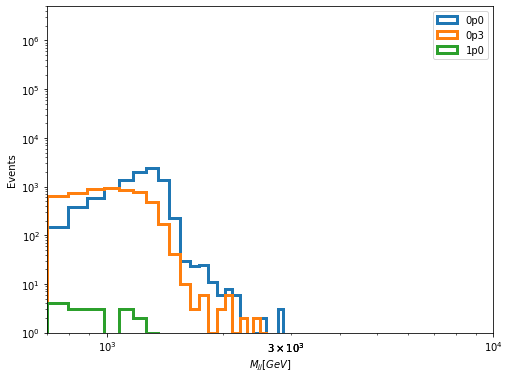

In [35]:
def hist_plot(X, label):
    lb, ub, n_bins = 7e2, 1e4, 100
    bins = np.linspace(lb, ub, n_bins)
    plt.hist(X, bins=bins, histtype="step", label=label, linewidth=3)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim([lb, ub])

    plt.ylim([1e0, 5e6])
    plt.text(2.6e3, 4e-1, "$3\\times10^3$")
    plt.xlabel("$M_{jj} [GeV]$")
    plt.ylabel("Events")
    plt.legend()

    
plt.figure(figsize=(8, 6))
rinvs = ["0p0", "0p3", "1p0"]
for rinv in rinvs:
    root_files = glob.glob(path.join(home, "data", "root_exports", rinv, "*.h5"))[:3]
    minvs = []
    for root_file in root_files:
        jets = pd.read_hdf(root_file, "Jet")
        for idx, entry in tqdm.tqdm(jets.groupby("entry")):
            # Gaurantee we have at least 2 jets
            if len(entry) >= 2:
                j1 = entry.iloc[0]
                j2 = entry.iloc[1]
                abs_eta = np.absolute(j1["Jet.Eta"] - j2["Jet.Eta"])
                # Only calculate minv if jets meet pT/eta cut
                if j1["Jet.PT"] > 440 and j2["Jet.PT"] > 60 and abs_eta <= 1.2:
                    minv = mass_inv(j1, j2)
                    minvs.append(minv)
        print(len(minvs))
    hist_plot(minvs, rinv)
plt.savefig(path.join("figures", "mJJ.png"))

In [ ]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 12})
lb, ub, n_bins = 7e2, 1e4, 150

mxds = ["5p0", "10p0"]
lams = ["5p0", "10p0"]

density = False
for mxd in mxds:
    for lam in lams:
        plt.figure(figsize=(8, 6))
        minv_files = natsorted(glob.glob("data/minv/*_mXd_%s_*_lam_%s.feather" %(mxd, lam)))
        for file in minv_files:
            X = pd.read_feather(file).minv
            deets = os.path.basename(file).split("_")
            mZ = deets[4].replace("p", ".")
            mXd = deets[6].replace("p", ".")
            rinv = deets[8].replace("p", ".")
            lam = deets[-1].split(".")[0].replace("p", ".")
            label = "$r_{inv}=%s$" %(rinv)
            bins = np.linspace(lb, ub, n_bins)
            plt.hist(X, bins=bins, histtype="step", density=density, label=label, linewidth=3)
        plt.yscale("log")
        plt.xscale("log")
        plt.xlim([lb, ub])
        if density:
            plt.ylim([1e-6, 1e0])
        else:
            plt.ylim([1e0, 5e6])
            plt.text(2.6e3, 4e-1, "$3\\times10^3$")
        plt.xlabel("$M_{jj} [GeV]$")
        plt.ylabel("Events")
        plt.title("$M_{Z'}=%s\, TeV - M_{xd}=%s\, GeV - \Lambda=%s$" %(mZ, mXd, lam))
        plt.legend()
        plt.savefig("figures/Mjj_mXd_%s_lam_%s.png" %(mXd, lam))
        plt.show()